In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix


In [3]:
train='dataset/NF-ToN-IoT.csv'

train_data=pd.read_csv(train)

In [4]:
train_data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0,Benign
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0,Benign
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0,Benign
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379274 entries, 0 to 1379273
Data columns (total 14 columns):
IPV4_SRC_ADDR                 1379274 non-null object
L4_SRC_PORT                   1379274 non-null int64
IPV4_DST_ADDR                 1379274 non-null object
L4_DST_PORT                   1379274 non-null int64
PROTOCOL                      1379274 non-null int64
L7_PROTO                      1379274 non-null float64
IN_BYTES                      1379274 non-null int64
OUT_BYTES                     1379274 non-null int64
IN_PKTS                       1379274 non-null int64
OUT_PKTS                      1379274 non-null int64
TCP_FLAGS                     1379274 non-null int64
FLOW_DURATION_MILLISECONDS    1379274 non-null int64
Label                         1379274 non-null int64
Attack                        1379274 non-null object
dtypes: float64(1), int64(10), object(3)
memory usage: 147.3+ MB


In [6]:
del train_data['IPV4_SRC_ADDR']
del train_data['IPV4_DST_ADDR']
del train_data['Attack'].

In [7]:
data = train_data.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379274 entries, 0 to 1379273
Data columns (total 11 columns):
L4_SRC_PORT                   1379274 non-null int64
L4_DST_PORT                   1379274 non-null int64
PROTOCOL                      1379274 non-null int64
L7_PROTO                      1379274 non-null float64
IN_BYTES                      1379274 non-null int64
OUT_BYTES                     1379274 non-null int64
IN_PKTS                       1379274 non-null int64
OUT_PKTS                      1379274 non-null int64
TCP_FLAGS                     1379274 non-null int64
FLOW_DURATION_MILLISECONDS    1379274 non-null int64
Label                         1379274 non-null int64
dtypes: float64(1), int64(10)
memory usage: 115.8 MB


In [9]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

In [10]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1103419, 10) (1103419,)
(275855, 10) (275855,)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# CNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [28]:
X_train=X_train.values
X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [29]:
verbose, epoch, batch_size = 1, 100, 4
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1282      
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


In [30]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = 2)

Epoch 1/5
13173/13173 [==============================] - 39s 3ms/step - loss: 158461.5469 - accuracy: 0.6777 - val_loss: 0.4993 - val_accuracy: 0.7427
Epoch 2/5
13173/13173 [==============================] - 35s 3ms/step - loss: 1.2248 - accuracy: 0.7393 - val_loss: 0.4907 - val_accuracy: 0.7588
Epoch 3/5
13173/13173 [==============================] - 35s 3ms/step - loss: 0.5158 - accuracy: 0.7583 - val_loss: 0.4834 - val_accuracy: 0.7748
Epoch 4/5
13173/13173 [==============================] - 34s 3ms/step - loss: 1.3306 - accuracy: 0.7629 - val_loss: 0.4787 - val_accuracy: 0.7754
Epoch 5/5
13173/13173 [==============================] - 35s 3ms/step - loss: 0.5068 - accuracy: 0.7667 - val_loss: 0.4785 - val_accuracy: 0.7754


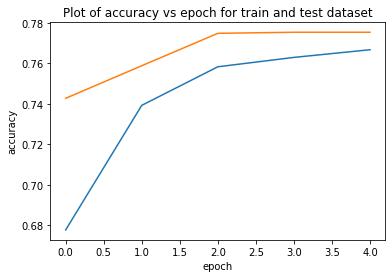

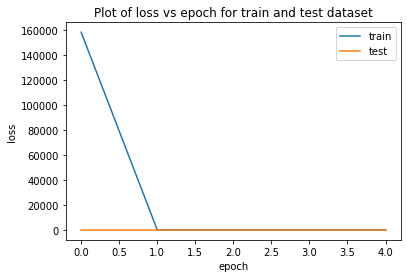

In [32]:
# Plot of accuracy vs epoch for train and test dataset
import matplotlib.pyplot as plt
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [33]:
y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

cnn_acc = accuracy_score(y_pred, y_test)
cnn_prec = precision_score(y_pred, y_test,average='weighted')
cnn_rec = recall_score(y_pred, y_test,average='weighted')
cnn_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1)

515/515 [==============================] - 0s 549us/step


In [18]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

# CNN + BiLSTM

In [37]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 256)           164864    
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [39]:
modelhistory = model_en.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = 16)

Epoch 1/5
3294/3294 [==============================] - 32s 9ms/step - loss: 0.2036 - acc: 0.6969 - val_loss: 0.1954 - val_acc: 0.7065
Epoch 2/5
3294/3294 [==============================] - 30s 9ms/step - loss: 0.2022 - acc: 0.6971 - val_loss: 0.1936 - val_acc: 0.7132
Epoch 3/5
3294/3294 [==============================] - 30s 9ms/step - loss: 0.2014 - acc: 0.6982 - val_loss: 0.1919 - val_acc: 0.7147
Epoch 4/5
3294/3294 [==============================] - 31s 9ms/step - loss: 0.2058 - acc: 0.6891 - val_loss: 0.1957 - val_acc: 0.7055
Epoch 5/5
3294/3294 [==============================] - 31s 9ms/step - loss: 0.2070 - acc: 0.6896 - val_loss: 0.1992 - val_acc: 0.7061


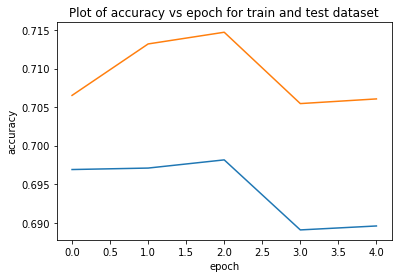

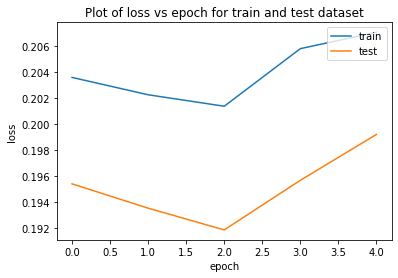

In [40]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [42]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

515/515 [==============================] - 2s 3ms/step


In [19]:
storeResults('CNN + BiLSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# CNN + LSTM

In [44]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           82432     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [48]:
modelhistory = model_en.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = 8)

Epoch 1/5
6587/6587 [==============================] - 62s 9ms/step - loss: 0.2476 - acc: 0.5497 - val_loss: 0.2472 - val_acc: 0.5554
Epoch 2/5
6587/6587 [==============================] - 61s 9ms/step - loss: 0.2476 - acc: 0.5497 - val_loss: 0.2469 - val_acc: 0.5554
Epoch 3/5
6587/6587 [==============================] - 61s 9ms/step - loss: 0.2476 - acc: 0.5497 - val_loss: 0.2469 - val_acc: 0.5554
Epoch 4/5
6587/6587 [==============================] - 61s 9ms/step - loss: 0.2476 - acc: 0.5497 - val_loss: 0.2470 - val_acc: 0.5554
Epoch 5/5
6587/6587 [==============================] - 61s 9ms/step - loss: 0.2476 - acc: 0.5497 - val_loss: 0.2470 - val_acc: 0.5554


In [52]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

515/515 [==============================] - 1s 2ms/step


In [20]:
storeResults('CNN + LSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# BiLSTM + CNN

In [57]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 256)           164864    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 32)            24608     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 32)             0

In [58]:
modelhistory = model_en.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = 8)

Epoch 1/5
6587/6587 [==============================] - 68s 10ms/step - loss: 0.2169 - acc: 0.6741 - val_loss: 0.1734 - val_acc: 0.7419
Epoch 2/5
6587/6587 [==============================] - 65s 10ms/step - loss: 0.1964 - acc: 0.7114 - val_loss: 0.1944 - val_acc: 0.6958
Epoch 3/5
6587/6587 [==============================] - 65s 10ms/step - loss: 0.2067 - acc: 0.6810 - val_loss: 0.2162 - val_acc: 0.7251
Epoch 4/5
6587/6587 [==============================] - 65s 10ms/step - loss: 0.2412 - acc: 0.5731 - val_loss: 0.2451 - val_acc: 0.5633
Epoch 5/5
6587/6587 [==============================] - 64s 10ms/step - loss: 0.2454 - acc: 0.5591 - val_loss: 0.2445 - val_acc: 0.5654


In [59]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

515/515 [==============================] - 2s 3ms/step


In [21]:
storeResults('BiLSTM+CNN',ense_acc,ense_prec,ense_rec,ense_f1)

# DNN

In [61]:
from tensorflow.keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

In [62]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [63]:
x_train = preprocessing.normalize(X_train)
x_test = preprocessing.normalize(X_test)

In [64]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 2       # how many samples to use for each gradient descent update

In [67]:
# create a sequential model
model2 = models.Sequential()

# add the hidden layer
model2.add(layers.Dense(input_dim=12,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model2.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model2.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [68]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model2.fit(x_train, y_train, epochs=5, batch_size=batch_size,steps_per_epoch=1000, validation_steps=1000)

Epoch 1/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5680 - accuracy: 0.7265
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5561 - accuracy: 0.7280
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5597 - accuracy: 0.7245
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.7375
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5122 - accuracy: 0.7420


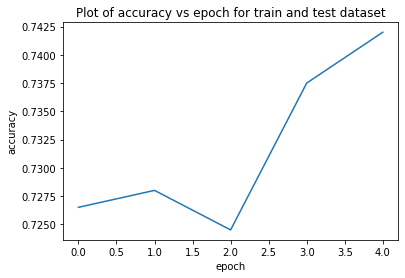

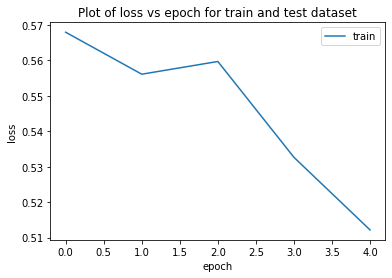

In [70]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [71]:
y_pred = model2.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dnn_acc = accuracy_score(y_pred, y_test)
dnn_prec = precision_score(y_pred, y_test,average='weighted')
dnn_rec = recall_score(y_pred, y_test,average='weighted')
dnn_f1 = f1_score(y_pred, y_test,average='weighted')

515/515 [==============================] - 0s 348us/step


In [22]:
storeResults('DNN',dnn_acc,dnn_prec,dnn_rec,dnn_f1)

# CMTNN

In [73]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras import regularizers

In [74]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [76]:
train_min = X_train.min()
train_max = X_train.max()
x_train = (X_train - train_min) / (train_max - train_min)
x_test = (X_test - train_min) / (train_max - train_min)

In [77]:
positives = x_train[y_train == 1]
negatives = x_train[y_train == 0]

In [78]:
## input layer 
input_layer = Input(shape=negatives.shape[1:])

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(75, activation='tanh')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(25, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(7, activation='relu')(encoded)

## decoding part
decoded = Dense(7, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(75, activation='tanh')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(negatives.shape[1], activation='relu')(decoded)

In [79]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse", metrics=['accuracy'])

In [80]:
autoencoder.fit(negatives, negatives, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
925/925 [==============================] - 20s 15ms/step - loss: 0.2566 - accuracy: 0.1041
Epoch 2/5
925/925 [==============================] - 14s 15ms/step - loss: 0.2105 - accuracy: 0.1387
Epoch 3/5
925/925 [==============================] - 14s 15ms/step - loss: 0.1729 - accuracy: 0.1805
Epoch 4/5
925/925 [==============================] - 14s 15ms/step - loss: 0.1434 - accuracy: 0.2093
Epoch 5/5
925/925 [==============================] - 14s 15ms/step - loss: 0.1201 - accuracy: 0.2289


In [81]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])
hidden_representation.add(autoencoder.layers[5])
hidden_representation.add(autoencoder.layers[6])
hidden_representation.add(autoencoder.layers[7])
hidden_representation.add(autoencoder.layers[8])
hidden_representation.add(autoencoder.layers[9])

In [82]:
x_train_transformed = hidden_representation.predict(x_train)
x_test_transformed = hidden_representation.predict(x_test)

In [83]:
predictor = Sequential()
predictor.add(Dense(64, activation='relu', input_shape=x_train_transformed.shape[1:]))
predictor.add(BatchNormalization())
predictor.add(Dropout(0.25))
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='tanh'))
predictor.add(BatchNormalization())
predictor.add(Dense(1, activation='sigmoid'))

In [84]:
predictor.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = predictor.fit(x_train_transformed, y_train, batch_size=2, epochs=5)

Epoch 1/5
32933/32933 [==============================] - 275s 8ms/step - loss: 0.6225 - accuracy: 0.6642
Epoch 2/5
32933/32933 [==============================] - 273s 8ms/step - loss: 0.5725 - accuracy: 0.7151
Epoch 3/5
32933/32933 [==============================] - 275s 8ms/step - loss: 0.5661 - accuracy: 0.7201
Epoch 4/5
32933/32933 [==============================] - 274s 8ms/step - loss: 0.5523 - accuracy: 0.7242
Epoch 5/5
32933/32933 [==============================] - 273s 8ms/step - loss: 0.5587 - accuracy: 0.7213


In [85]:
y_predict = predictor.predict(x_test_transformed)

In [87]:
trans_acc = accuracy_score(y_test, y_predict >= 0.35)
trans_prec = precision_score(y_test, y_predict >= 0.35,average='weighted')
trans_rec = recall_score(y_test, y_predict >= 0.35,average='weighted')
trans_f1 = f1_score(y_test, y_predict >= 0.35,average='weighted')

In [23]:
storeResults('CMTNN(Time Series NN)',trans_acc,trans_prec,trans_rec,trans_f1)

# CM BiLSTM

In [89]:
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM,GRU, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [90]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X)

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [92]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_X=X_train
val_X=X_test

In [93]:
## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [94]:
## Recuperation des labels
train_y=y_train
val_y=y_test

In [95]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [99]:
inputs1=Input((1,12))
att_in=Bidirectional(LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [100]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
history=model1.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y),steps_per_epoch=100,validation_steps=100)

Epoch 1/5
100/100 [==============================] - 6s 31ms/step - loss: 0.6768 - accuracy: 0.6553 - val_loss: 0.5863 - val_accuracy: 0.7650
Epoch 2/5
100/100 [==============================] - 2s 19ms/step - loss: 0.5701 - accuracy: 0.7150 - val_loss: 0.5027 - val_accuracy: 0.7500
Epoch 3/5
100/100 [==============================] - 2s 20ms/step - loss: 0.5005 - accuracy: 0.7257 - val_loss: 0.4679 - val_accuracy: 0.7550
Epoch 4/5
100/100 [==============================] - 2s 19ms/step - loss: 0.5373 - accuracy: 0.7152 - val_loss: 0.4646 - val_accuracy: 0.7750
Epoch 5/5
100/100 [==============================] - 2s 19ms/step - loss: 0.4781 - accuracy: 0.7223 - val_loss: 0.4497 - val_accuracy: 0.7100


In [102]:
# evaluate the model
_, train_acc = model1.evaluate(train_X, train_y, verbose=0)
_, test_acc = model1.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.728, Test: 0.726


In [103]:
y_pred = model1.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
lstm_acc = test_acc
lstm_prec = precision_score(y_pred, val_y,average='weighted')
lstm_rec = recall_score(y_pred, val_y,average='weighted')
lstm_f1 = f1_score(y_pred, val_y,average='weighted')

772/772 [==============================] - 4s 4ms/step


In [24]:
storeResults('CM BiLSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1)

ML

In [11]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier()
clf2 = RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('mlp', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [25]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Comparison

In [26]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        
                      })

In [27]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CNN,0.770,0.814,0.770,0.772
1,CNN + BiLSTM,0.694,0.707,0.694,0.694
2,CNN + LSTM,0.550,1.000,0.550,0.709
3,BiLSTM+CNN,0.559,0.998,0.559,0.709
4,DNN,0.450,1.000,0.450,0.620
5,CMTNN(Time Series NN),0.771,0.780,0.771,0.771
6,CM BiLSTM,0.723,0.998,0.450,0.616
7,Voting Classifier,0.999,0.999,0.999,0.999


# Modeling

In [28]:
import joblib
filename = 'model_nf.sav'
joblib.dump(eclf1, filename)


['model_nf.sav']

# Graph

In [29]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

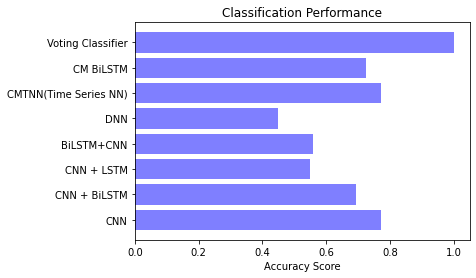

In [31]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

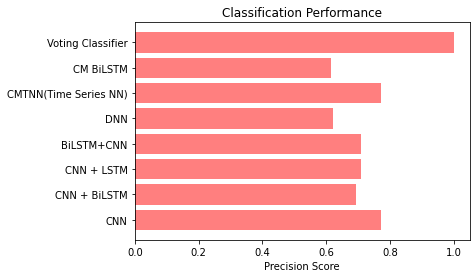

In [32]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

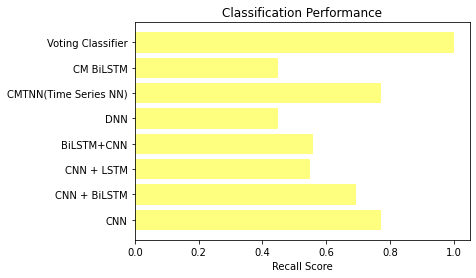

In [33]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

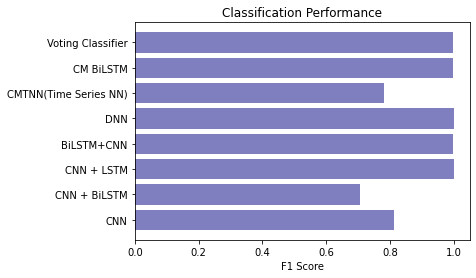

In [34]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()